In [ ]:
#import
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Interpolate Polutant**

In [ ]:
#change excel file into Dataframe
polutan_raw = pd.read_excel('/content/drive/MyDrive/dataset/Dataset Zat Polutan.xlsx')
df_polutan = pd.DataFrame(polutan_raw)

df_polutan

tanggal                           stasiun pm10 so2  co   o3  no2  \
0    2019-01-01                DKI1 (Bunderan HI)   29  15   5  NaN   13   
1    2019-01-02                DKI1 (Bunderan HI)   24  17   5  NaN    6   
2    2019-01-03                DKI1 (Bunderan HI)   16  16   5   29    4   
3    2019-01-04                DKI1 (Bunderan HI)   38  18   8   24  NaN   
4    2019-01-05                DKI1 (Bunderan HI)   37  29  16  NaN   16   
...         ...                               ...  ...  ..  ..  ...  ...   
5475 2021-12-27  DKI5 (Kebon Jeruk) Jakarta Barat   54  36  14   21   47   
5476 2021-12-28  DKI5 (Kebon Jeruk) Jakarta Barat   44  20  11   21   33   
5477 2021-12-29  DKI5 (Kebon Jeruk) Jakarta Barat   34  28   8   25   29   
5478 2021-12-30  DKI5 (Kebon Jeruk) Jakarta Barat   53  25  15   23   44   
5479 2021-12-31  DKI5 (Kebon Jeruk) Jakarta Barat   60  28  19   30   53   

       max critical categori  
0     29.0     PM10     BAIK  
1     24.0     PM10     BAIK  
2     29.0       O3     BAIK  
3     38.0     PM10     BAIK  
4     37.0     PM10     BAIK  
...    ...      ...      ...  
5475  76.0     PM25   SEDANG  
5476  68.0     PM25   SEDANG  
5477  54.0     PM25   SEDANG  
5478  75.0     PM25   SEDANG  
5479  87.0     PM25   SEDANG  

[5480 rows x 10 columns]

In [ ]:
#delete some variables
df_polutan = df_polutan.drop(['max', 'critical', 'categori'], axis=1)

In [ ]:
df_polutan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  5480 non-null   datetime64[ns]
 1   stasiun  5480 non-null   object        
 2   pm10     5472 non-null   object        
 3   so2      5469 non-null   object        
 4   co       5470 non-null   object        
 5   o3       5461 non-null   object        
 6   no2      5454 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 299.8+ KB


In [ ]:
columns_name = df_polutan.columns
numeric_columns = columns_name[2:]
for col in numeric_columns :
  df_polutan[col] = pd.to_numeric(df_polutan[col], errors = 'coerce')

In [ ]:
#change --- into NaN
df_polutan.replace('---', np.nan, inplace=True)

df_polutan

tanggal                           stasiun  pm10   so2    co    o3  \
0    2019-01-01                DKI1 (Bunderan HI)  29.0  15.0   5.0   NaN   
1    2019-01-02                DKI1 (Bunderan HI)  24.0  17.0   5.0   NaN   
2    2019-01-03                DKI1 (Bunderan HI)  16.0  16.0   5.0  29.0   
3    2019-01-04                DKI1 (Bunderan HI)  38.0  18.0   8.0  24.0   
4    2019-01-05                DKI1 (Bunderan HI)  37.0  29.0  16.0   NaN   
...         ...                               ...   ...   ...   ...   ...   
5475 2021-12-27  DKI5 (Kebon Jeruk) Jakarta Barat  54.0  36.0  14.0  21.0   
5476 2021-12-28  DKI5 (Kebon Jeruk) Jakarta Barat  44.0  20.0  11.0  21.0   
5477 2021-12-29  DKI5 (Kebon Jeruk) Jakarta Barat  34.0  28.0   8.0  25.0   
5478 2021-12-30  DKI5 (Kebon Jeruk) Jakarta Barat  53.0  25.0  15.0  23.0   
5479 2021-12-31  DKI5 (Kebon Jeruk) Jakarta Barat  60.0  28.0  19.0  30.0   

       no2  
0     13.0  
1      6.0  
2      4.0  
3      NaN  
4     16.0  
...    ...  
5475  47.0  
5476  33.0  
5477  29.0  
5478  44.0  
5479  53.0  

[5480 rows x 7 columns]

In [ ]:
#interpolate NaN value
df_polutan_int = df_polutan[['pm10','so2','co','o3','no2']].interpolate(method='linear')

In [ ]:
df_polutan_index = df_polutan[['tanggal', 'stasiun']]
df_polutan_int = pd.concat([df_polutan_index,df_polutan_int], axis=1)

In [ ]:
df_polutan_int

tanggal                           stasiun  pm10   so2    co     o3  \
0    2019-01-01                DKI1 (Bunderan HI)  29.0  15.0   5.0    NaN   
1    2019-01-02                DKI1 (Bunderan HI)  24.0  17.0   5.0    NaN   
2    2019-01-03                DKI1 (Bunderan HI)  16.0  16.0   5.0  29.00   
3    2019-01-04                DKI1 (Bunderan HI)  38.0  18.0   8.0  24.00   
4    2019-01-05                DKI1 (Bunderan HI)  37.0  29.0  16.0  40.25   
...         ...                               ...   ...   ...   ...    ...   
5475 2021-12-27  DKI5 (Kebon Jeruk) Jakarta Barat  54.0  36.0  14.0  21.00   
5476 2021-12-28  DKI5 (Kebon Jeruk) Jakarta Barat  44.0  20.0  11.0  21.00   
5477 2021-12-29  DKI5 (Kebon Jeruk) Jakarta Barat  34.0  28.0   8.0  25.00   
5478 2021-12-30  DKI5 (Kebon Jeruk) Jakarta Barat  53.0  25.0  15.0  23.00   
5479 2021-12-31  DKI5 (Kebon Jeruk) Jakarta Barat  60.0  28.0  19.0  30.00   

       no2  
0     13.0  
1      6.0  
2      4.0  
3     10.0  
4     16.0  
...    ...  
5475  47.0  
5476  33.0  
5477  29.0  
5478  44.0  
5479  53.0  

[5480 rows x 7 columns]

In [ ]:
#fill first 2 row of O3 value with the next value
df_polutan_int['o3'].bfill(inplace = True)

df_polutan_int

tanggal                           stasiun  pm10   so2    co     o3  \
0    2019-01-01                DKI1 (Bunderan HI)  29.0  15.0   5.0  29.00   
1    2019-01-02                DKI1 (Bunderan HI)  24.0  17.0   5.0  29.00   
2    2019-01-03                DKI1 (Bunderan HI)  16.0  16.0   5.0  29.00   
3    2019-01-04                DKI1 (Bunderan HI)  38.0  18.0   8.0  24.00   
4    2019-01-05                DKI1 (Bunderan HI)  37.0  29.0  16.0  40.25   
...         ...                               ...   ...   ...   ...    ...   
5475 2021-12-27  DKI5 (Kebon Jeruk) Jakarta Barat  54.0  36.0  14.0  21.00   
5476 2021-12-28  DKI5 (Kebon Jeruk) Jakarta Barat  44.0  20.0  11.0  21.00   
5477 2021-12-29  DKI5 (Kebon Jeruk) Jakarta Barat  34.0  28.0   8.0  25.00   
5478 2021-12-30  DKI5 (Kebon Jeruk) Jakarta Barat  53.0  25.0  15.0  23.00   
5479 2021-12-31  DKI5 (Kebon Jeruk) Jakarta Barat  60.0  28.0  19.0  30.00   

       no2  
0     13.0  
1      6.0  
2      4.0  
3     10.0  
4     16.0  
...    ...  
5475  47.0  
5476  33.0  
5477  29.0  
5478  44.0  
5479  53.0  

[5480 rows x 7 columns]

In [ ]:
#sum up NaN value for each variables
df_polutan_int.isna().sum()

tanggal    0
stasiun    0
pm10       0
so2        0
co         0
o3         0
no2        0
dtype: int64

In [ ]:
#change format of tanggal variable to datetime
df_polutan_int['tanggal'] = pd.to_datetime(df_polutan_int['tanggal'])

In [ ]:
#change value of each station into integer
df_polutan_int.replace(['DKI1 (Bunderan HI)', 'DKI2 (Kelapa Gading)', 'DKI3 (Jagakarsa)', 'DKI4 (Lubang Buaya)', 'DKI5 (Kebon Jeruk)', 'DKI5 (Kebon Jeruk) Jakarta Barat'], [1,2,3,4,5,5], inplace=True)

#change format of tanggal variable to datetime
df_polutan_int['stasiun'] = df_polutan_int['stasiun'].astype(str).astype(int)

df_polutan_int

tanggal  stasiun  pm10   so2    co     o3   no2
0    2019-01-01        1  29.0  15.0   5.0  29.00  13.0
1    2019-01-02        1  24.0  17.0   5.0  29.00   6.0
2    2019-01-03        1  16.0  16.0   5.0  29.00   4.0
3    2019-01-04        1  38.0  18.0   8.0  24.00  10.0
4    2019-01-05        1  37.0  29.0  16.0  40.25  16.0
...         ...      ...   ...   ...   ...    ...   ...
5475 2021-12-27        5  54.0  36.0  14.0  21.00  47.0
5476 2021-12-28        5  44.0  20.0  11.0  21.00  33.0
5477 2021-12-29        5  34.0  28.0   8.0  25.00  29.0
5478 2021-12-30        5  53.0  25.0  15.0  23.00  44.0
5479 2021-12-31        5  60.0  28.0  19.0  30.00  53.0

[5480 rows x 7 columns]

In [ ]:
#print info of dataset
df_polutan_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  5480 non-null   datetime64[ns]
 1   stasiun  5480 non-null   int64         
 2   pm10     5480 non-null   float64       
 3   so2      5480 non-null   float64       
 4   co       5480 non-null   float64       
 5   o3       5480 non-null   float64       
 6   no2      5480 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 299.8 KB


**Count ISPU**

In [ ]:
ispu_data = [[50, 50, 15.5, 52, 4000, 120, 80, 45], [100, 150, 55.4, 180, 8000, 235, 200,100], [200, 350, 150.4, 400, 15000, 400, 1130, 215], [300, 420, 250.4, 800, 30000, 800, 2260, 432], [500, 500, 500, 1200, 45000, 1000, 3000, 648]]
ispu_conv = pd.DataFrame(ispu_data, columns=['ISPU','PM10','PM2.5','SO2','CO','O3','NO2','HC'])

In [ ]:
ispu_conv

ISPU  PM10  PM2.5   SO2     CO    O3   NO2   HC
0    50    50   15.5    52   4000   120    80   45
1   100   150   55.4   180   8000   235   200  100
2   200   350  150.4   400  15000   400  1130  215
3   300   420  250.4   800  30000   800  2260  432
4   500   500  500.0  1200  45000  1000  3000  648

In [ ]:
  pm10_curr = df_polutan_int['pm10']
  ispu_arr = []
  for i in pm10_curr:
    if(i<=50):
      Ia = ispu_conv['ISPU'][1]
      Ib = 0
      Xa = ispu_conv['PM10'][1]
      Xb = 0
    elif(i>50 and i<=100):
      Ia = ispu_conv['ISPU'][1]
      Ib = ispu_conv['ISPU'][0]
      Xa = ispu_conv['PM10'][1]
      Xb = ispu_conv['PM10'][0]
    elif(i>100 and i<=200):
      Ia = ispu_conv['ISPU'][2]
      Ib = ispu_conv['ISPU'][1]
      Xa = ispu_conv['PM10'][2]
      Xb = ispu_conv['PM10'][1]
    elif(i>200 and i<=300):
      Ia = ispu_conv['ISPU'][3]
      Ib = ispu_conv['ISPU'][2]
      Xa = ispu_conv['PM10'][3]
      Xb = ispu_conv['PM10'][2]
    elif(i>300 and i<=500):
      Ia = ispu_conv['ISPU'][4]
      Ib = ispu_conv['ISPU'][3]
      Xa = ispu_conv['PM10'][4]
      Xb = ispu_conv['PM10'][3]
    I = round((((Ia - Ib) / (Xa - Xb)) * (i - Xb)) + Ib)
    ispu_arr.append(I)

In [ ]:
df_polutan_int

tanggal  stasiun  pm10   so2    co     o3   no2  ispu
0    2019-01-01        1  29.0  15.0   5.0  29.00  13.0    19
1    2019-01-02        1  24.0  17.0   5.0  29.00   6.0    16
2    2019-01-03        1  16.0  16.0   5.0  29.00   4.0    11
3    2019-01-04        1  38.0  18.0   8.0  24.00  10.0    25
4    2019-01-05        1  37.0  29.0  16.0  40.25  16.0    25
...         ...      ...   ...   ...   ...    ...   ...   ...
5475 2021-12-27        5  54.0  36.0  14.0  21.00  47.0    52
5476 2021-12-28        5  44.0  20.0  11.0  21.00  33.0    29
5477 2021-12-29        5  34.0  28.0   8.0  25.00  29.0    23
5478 2021-12-30        5  53.0  25.0  15.0  23.00  44.0    52
5479 2021-12-31        5  60.0  28.0  19.0  30.00  53.0    55

[5480 rows x 8 columns]

**Pearson Correlation Coefficient**

In [ ]:
st1_ispu = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==1]['ispu']).rename(columns = {'ispu' : 'St 1'}).reset_index().drop('index', axis=1)
st2_ispu = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==2]['ispu']).rename(columns = {'ispu' : 'St 2'}).reset_index().drop('index', axis=1)
st3_ispu = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==3]['ispu']).rename(columns = {'ispu' : 'St 3'}).reset_index().drop('index', axis=1)
st4_ispu = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==4]['ispu']).rename(columns = {'ispu' : 'St 4'}).reset_index().drop('index', axis=1)
st5_ispu = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==5]['ispu']).rename(columns = {'ispu' : 'St 5'}).reset_index().drop('index', axis=1)

ispu_concat = pd.concat([st1_ispu, st2_ispu, st3_ispu, st4_ispu, st5_ispu], axis=1)
#pm10_concat.to_excel('pm10.xlsx')
# pm10_concat.sum()
ispu_concat.corr(method='pearson')

St 1      St 2      St 3      St 4      St 5
St 1  1.000000  0.829894  0.631850  0.704507  0.810097
St 2  0.829894  1.000000  0.621874  0.778659  0.800169
St 3  0.631850  0.621874  1.000000  0.574409  0.672273
St 4  0.704507  0.778659  0.574409  1.000000  0.701482
St 5  0.810097  0.800169  0.672273  0.701482  1.000000

In [ ]:
st1_pm10 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==1]['pm10']).rename(columns = {'pm10' : 'St 1'}).reset_index().drop('index', axis=1)
st2_pm10 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==2]['pm10']).rename(columns = {'pm10' : 'St 2'}).reset_index().drop('index', axis=1)
st3_pm10 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==3]['pm10']).rename(columns = {'pm10' : 'St 3'}).reset_index().drop('index', axis=1)
st4_pm10 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==4]['pm10']).rename(columns = {'pm10' : 'St 4'}).reset_index().drop('index', axis=1)
st5_pm10 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==5]['pm10']).rename(columns = {'pm10' : 'St 5'}).reset_index().drop('index', axis=1)

pm10_concat = pd.concat([st1_pm10, st2_pm10, st3_pm10, st4_pm10, st5_pm10], axis=1)
#pm10_concat.to_excel('pm10.xlsx')
# pm10_concat.sum()
pm10_concat.corr(method='pearson')

St 1      St 2      St 3      St 4      St 5
St 1  1.000000  0.871611  0.681312  0.712260  0.846928
St 2  0.871611  1.000000  0.686435  0.739177  0.850591
St 3  0.681312  0.686435  1.000000  0.591263  0.721102
St 4  0.712260  0.739177  0.591263  1.000000  0.695489
St 5  0.846928  0.850591  0.721102  0.695489  1.000000

In [ ]:
st1_so2 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==1]['so2']).rename(columns = {'so2' : 'St 1'}).reset_index().drop('index', axis=1)
st2_so2 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==2]['so2']).rename(columns = {'so2' : 'St 2'}).reset_index().drop('index', axis=1)
st3_so2 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==3]['so2']).rename(columns = {'so2' : 'St 3'}).reset_index().drop('index', axis=1)
st4_so2 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==4]['so2']).rename(columns = {'so2' : 'St 4'}).reset_index().drop('index', axis=1)
st5_so2 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==5]['so2']).rename(columns = {'so2' : 'St 5'}).reset_index().drop('index', axis=1)

so2_concat = pd.concat([st1_so2, st2_so2, st3_so2, st4_so2, st5_so2], axis=1)
#so2_concat.to_excel('so2.xlsx')
so2_concat.sum()
so2_concat.corr(method='pearson')

St 1      St 2      St 3      St 4      St 5
St 1  1.000000  0.612752  0.702686  0.528494  0.477825
St 2  0.612752  1.000000  0.774176  0.542244  0.543494
St 3  0.702686  0.774176  1.000000  0.569252  0.523484
St 4  0.528494  0.542244  0.569252  1.000000  0.677658
St 5  0.477825  0.543494  0.523484  0.677658  1.000000

In [ ]:
st1_co = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==1]['co']).rename(columns = {'co' : 'St 1'}).reset_index().drop('index', axis=1)
st2_co = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==2]['co']).rename(columns = {'co' : 'St 2'}).reset_index().drop('index', axis=1)
st3_co = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==3]['co']).rename(columns = {'co' : 'St 3'}).reset_index().drop('index', axis=1)
st4_co = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==4]['co']).rename(columns = {'co' : 'St 4'}).reset_index().drop('index', axis=1)
st5_co = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==5]['co']).rename(columns = {'co' : 'St 5'}).reset_index().drop('index', axis=1)

co_concat = pd.concat([st1_co, st2_co, st3_co, st4_co, st5_co], axis=1)
#co_concat.to_excel('co.xlsx')
co_concat.sum()
co_concat.corr(method='pearson')

St 1      St 2      St 3      St 4      St 5
St 1  1.000000  0.619700  0.454020  0.194343  0.201307
St 2  0.619700  1.000000  0.595454  0.311182  0.263782
St 3  0.454020  0.595454  1.000000  0.326617  0.317310
St 4  0.194343  0.311182  0.326617  1.000000  0.849440
St 5  0.201307  0.263782  0.317310  0.849440  1.000000

In [ ]:
st1_o3 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==1]['o3']).rename(columns = {'o3' : 'St 1'}).reset_index().drop('index', axis=1)
st2_o3 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==2]['o3']).rename(columns = {'o3' : 'St 2'}).reset_index().drop('index', axis=1)
st3_o3 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==3]['o3']).rename(columns = {'o3' : 'St 3'}).reset_index().drop('index', axis=1)
st4_o3 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==4]['o3']).rename(columns = {'o3' : 'St 4'}).reset_index().drop('index', axis=1)
st5_o3 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==5]['o3']).rename(columns = {'o3' : 'St 5'}).reset_index().drop('index', axis=1)

o3_concat = pd.concat([st1_o3, st2_o3, st3_o3, st4_o3, st5_o3], axis=1)
#o3_concat.to_excel('o3.xlsx')
o3_concat.sum()
o3_concat.corr(method='pearson')

St 1      St 2      St 3      St 4      St 5
St 1  1.000000  0.710884  0.746779  0.589694  0.654790
St 2  0.710884  1.000000  0.615091  0.479586  0.505557
St 3  0.746779  0.615091  1.000000  0.690790  0.705237
St 4  0.589694  0.479586  0.690790  1.000000  0.790680
St 5  0.654790  0.505557  0.705237  0.790680  1.000000

In [ ]:
st1_no2 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==1]['no2']).rename(columns = {'no2' : 'St 1'}).reset_index().drop('index', axis=1)
st2_no2 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==2]['no2']).rename(columns = {'no2' : 'St 2'}).reset_index().drop('index', axis=1)
st3_no2 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==3]['no2']).rename(columns = {'no2' : 'St 3'}).reset_index().drop('index', axis=1)
st4_no2 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==4]['no2']).rename(columns = {'no2' : 'St 4'}).reset_index().drop('index', axis=1)
st5_no2 = pd.DataFrame(df_polutan_int.loc[df_polutan_int['stasiun']==5]['no2']).rename(columns = {'no2' : 'St 5'}).reset_index().drop('index', axis=1)

no2_concat = pd.concat([st1_no2, st2_no2, st3_no2, st4_no2, st5_no2], axis=1)
#no2_concat.to_excel('no2.xlsx')
no2_concat.sum()
no2_concat.corr(method='pearson')

St 1      St 2      St 3      St 4      St 5
St 1  1.000000  0.740912  0.716575  0.241956  0.208779
St 2  0.740912  1.000000  0.799688  0.151041  0.180011
St 3  0.716575  0.799688  1.000000  0.103783  0.107384
St 4  0.241956  0.151041  0.103783  1.000000  0.844824
St 5  0.208779  0.180011  0.107384  0.844824  1.000000

**Interpolate Meteorology**

In [ ]:
##change excel file into Dataframe
meteorologi_raw = pd.read_excel('/content/drive/MyDrive/dataset/Dataset Meteorologi.xlsx')
df_meteorologi = pd.DataFrame(meteorologi_raw)

df_meteorologi

Tanggal  Stasiun  Tavg  RH_avg   RR  ddd_x  ff_avg
0     01-01-2019        1  26.0    84.0  8.5  240.0     2.0
1     02-01-2019        1  28.3    75.0  2.3  290.0     2.0
2     03-01-2019        1  28.3    74.0  0.4  280.0     2.0
3     04-01-2019        1  29.3    67.0  0.0  250.0     3.0
4     05-01-2019        1  28.9    71.0  0.0  280.0     1.0
...          ...      ...   ...     ...  ...    ...     ...
5475  27-12-2021        5  28.9    71.0  1.0  280.0     5.0
5476  28-12-2021        5  29.5    70.0  0.0  260.0     6.0
5477  29-12-2021        5  29.4    72.0  0.0  280.0     7.0
5478  30-12-2021        5  30.3    70.0  0.0  280.0     6.0
5479  31-12-2021        5  28.9    71.0  NaN  260.0     5.0

[5480 rows x 7 columns]

In [ ]:
#change 8888 to NaN
df_meteorologi.replace('8888', np.nan, inplace=True)

In [ ]:
#delete RR variable
df_meteorologi = df_meteorologi.drop('RR', axis=1)

In [ ]:
#interpolate NaN value
df_met_int = df_meteorologi.interpolate(method='linear')

df_met_int.isna().sum()

Tanggal    0
Stasiun    0
Tavg       0
RH_avg     0
ddd_x      0
ff_avg     0
dtype: int64

In [ ]:
#print info of dataset
df_met_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  5480 non-null   object 
 1   Stasiun  5480 non-null   int64  
 2   Tavg     5480 non-null   float64
 3   RH_avg   5480 non-null   float64
 4   ddd_x    5480 non-null   float64
 5   ff_avg   5480 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 257.0+ KB


In [ ]:
#change format of Tanggal variable into datetime
df_met_int['Tanggal'] = pd.to_datetime(df_met_int['Tanggal'])

<ipython-input-28-bfb104528119>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_met_int['Tanggal'] = pd.to_datetime(df_met_int['Tanggal'])


In [ ]:
#rename some columns name
df_met_int.rename(columns = {'Tanggal':'tanggal', 'Stasiun':'stasiun', 'Tavg':'temperature', 'RH_avg':'humidity', 'ddd_x':'wind direction', 'ff_avg':'wind speed'}, inplace = True)

In [ ]:
#final result of meteorologi dataset
df_met_int

tanggal  stasiun  temperature  humidity  wind direction  wind speed
0    2019-01-01        1         26.0      84.0           240.0         2.0
1    2019-02-01        1         28.3      75.0           290.0         2.0
2    2019-03-01        1         28.3      74.0           280.0         2.0
3    2019-04-01        1         29.3      67.0           250.0         3.0
4    2019-05-01        1         28.9      71.0           280.0         1.0
...         ...      ...          ...       ...             ...         ...
5475 2021-12-27        5         28.9      71.0           280.0         5.0
5476 2021-12-28        5         29.5      70.0           260.0         6.0
5477 2021-12-29        5         29.4      72.0           280.0         7.0
5478 2021-12-30        5         30.3      70.0           280.0         6.0
5479 2021-12-31        5         28.9      71.0           260.0         5.0

[5480 rows x 6 columns]

**Clean Polutant and Meteorology Dataset**

In [ ]:
#merge polutan and meteorologi dataset based on tanggal and stasiun
df_join = df_polutan_int.join(df_met_int.set_index(['tanggal','stasiun']), on=['tanggal','stasiun'])

df_join

tanggal  stasiun  pm10   so2    co     o3   no2  temperature  \
0    2019-01-01        1  29.0  15.0   5.0  29.00  13.0         26.0   
1    2019-01-02        1  24.0  17.0   5.0  29.00   6.0         27.0   
2    2019-01-03        1  16.0  16.0   5.0  29.00   4.0         28.3   
3    2019-01-04        1  38.0  18.0   8.0  24.00  10.0         28.3   
4    2019-01-05        1  37.0  29.0  16.0  40.25  16.0         28.6   
...         ...      ...   ...   ...   ...    ...   ...          ...   
5475 2021-12-27        5  54.0  36.0  14.0  21.00  47.0         28.9   
5476 2021-12-28        5  44.0  20.0  11.0  21.00  33.0         29.5   
5477 2021-12-29        5  34.0  28.0   8.0  25.00  29.0         29.4   
5478 2021-12-30        5  53.0  25.0  15.0  23.00  44.0         30.3   
5479 2021-12-31        5  60.0  28.0  19.0  30.00  53.0         28.9   

      humidity  wind direction  wind speed  
0         84.0           240.0         2.0  
1         83.0           260.0         1.0  
2         80.0           310.0         2.0  
3         76.0           200.0         2.0  
4         76.0           240.0         3.0  
...        ...             ...         ...  
5475      71.0           280.0         5.0  
5476      70.0           260.0         6.0  
5477      72.0           280.0         7.0  
5478      70.0           280.0         6.0  
5479      71.0           260.0         5.0  

[5480 rows x 11 columns]

In [ ]:
df_join.sum()

<ipython-input-32-18a861caba01>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_join.sum()


stasiun             16440.0
pm10               293934.5
so2                135771.0
co                  87400.0
o3                 308317.0
no2                 79267.5
temperature        155977.7
humidity           418316.0
wind direction    1115675.0
wind speed          11703.0
dtype: float64

In [ ]:
df_join.to_excel('/content/drive/MyDrive/dataset/Dataset Clean.xlsx', index=False)

In [ ]:
def graph_per_station(number) :
  st = pd.DataFrame(df_join.loc[df_join['stasiun']==number])
  cols = st.columns
  par = cols[2:]
  for col in par :
    plt.figure(figsize=(10,5))
    plt.plot(st['tanggal'], st[col])
    plt.title('{0} on station {1}'.format(col, number))
    plt.xlabel('Tanggal')
    plt.ylabel(col)
    plt.show()

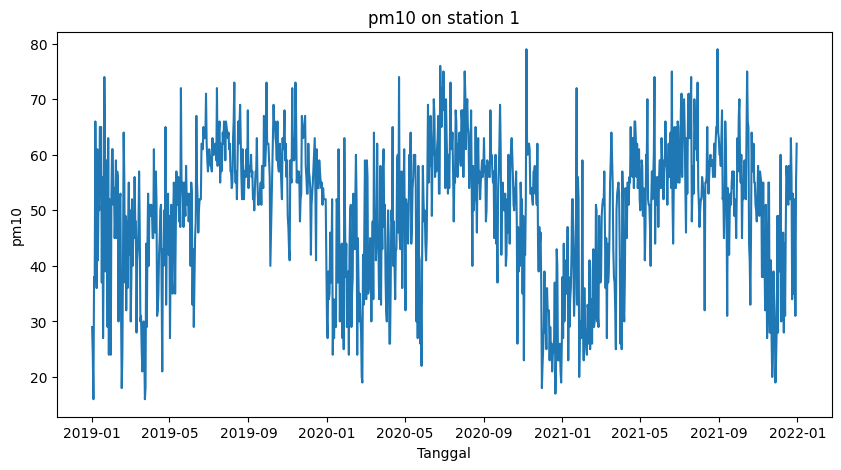

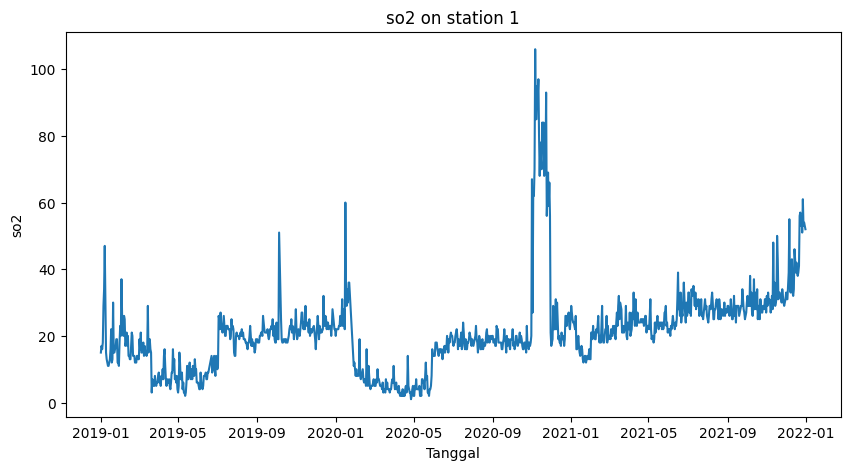

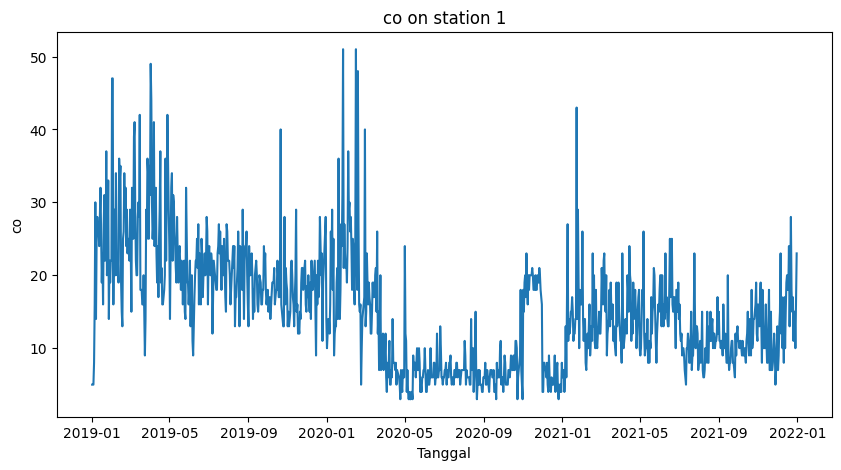

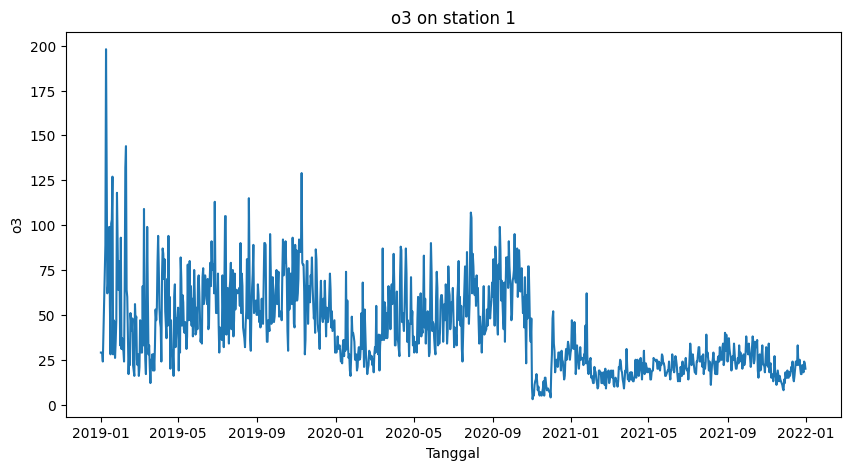

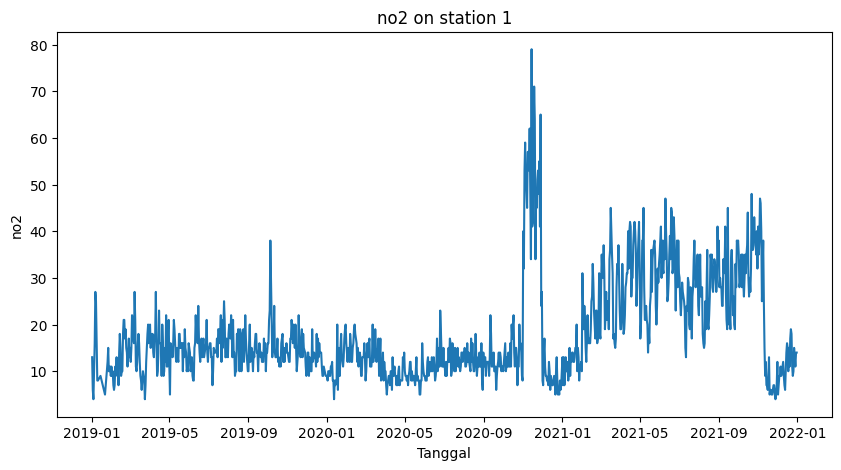

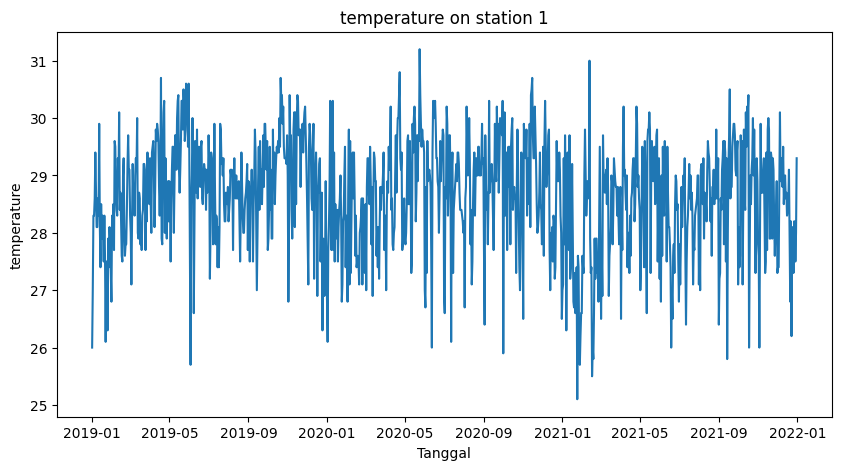

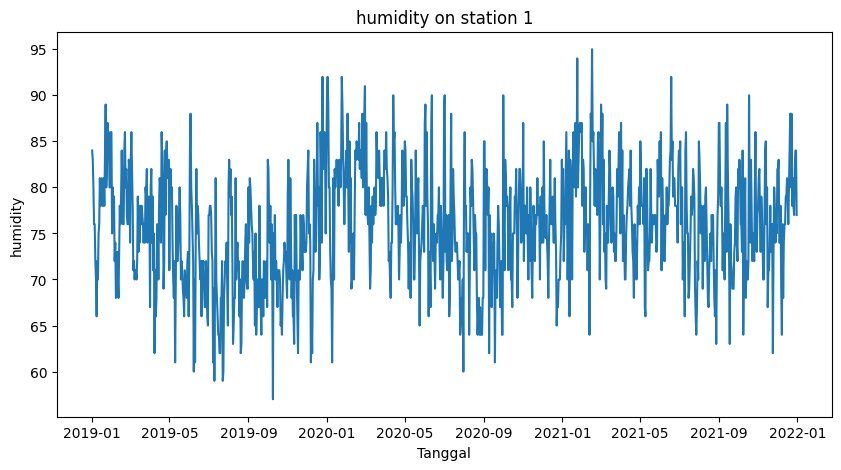

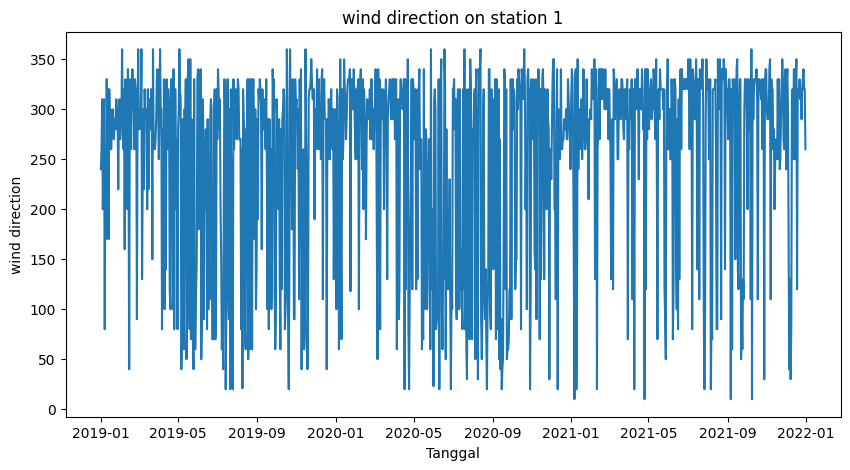

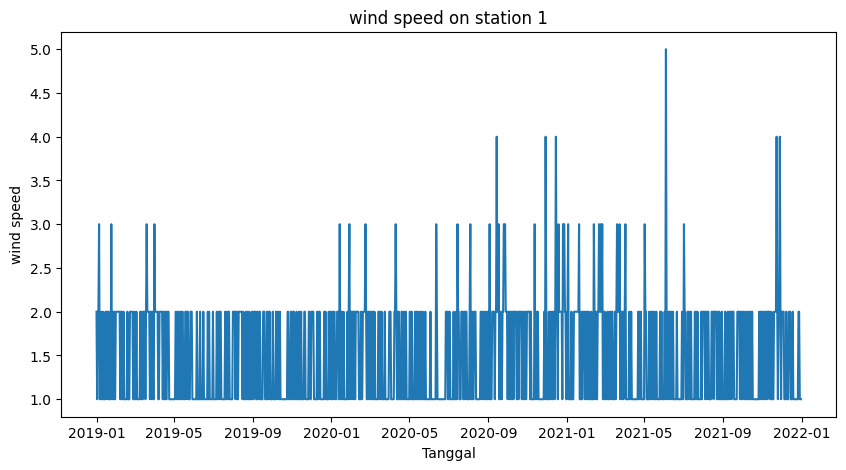

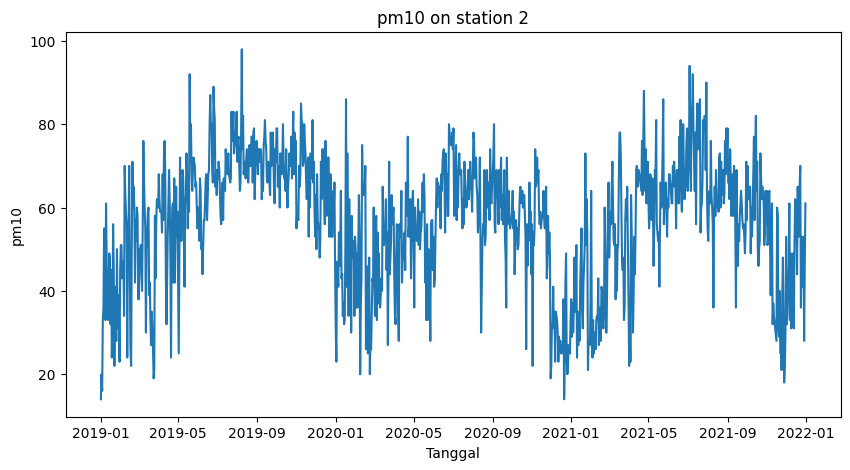

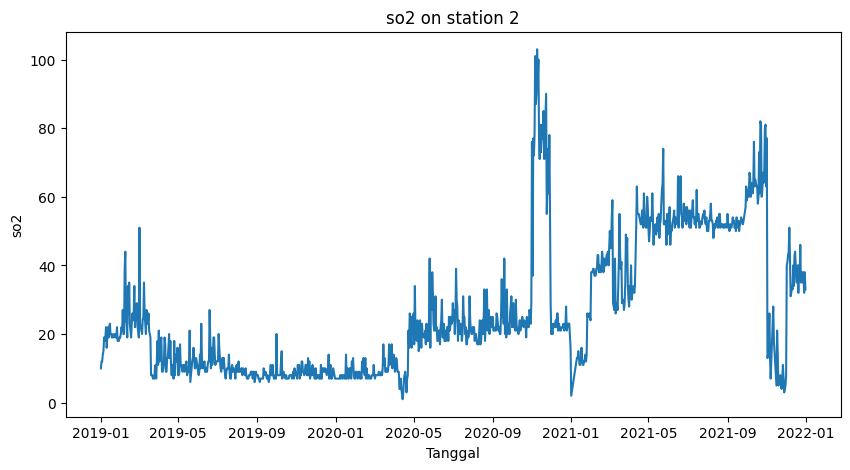

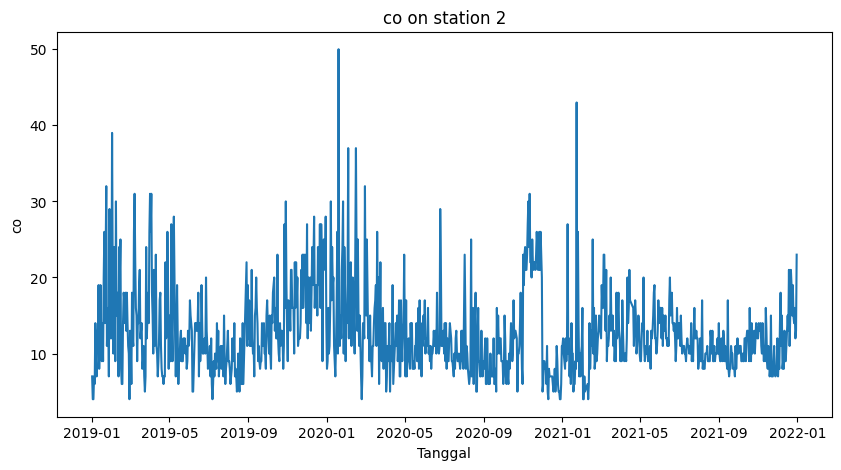

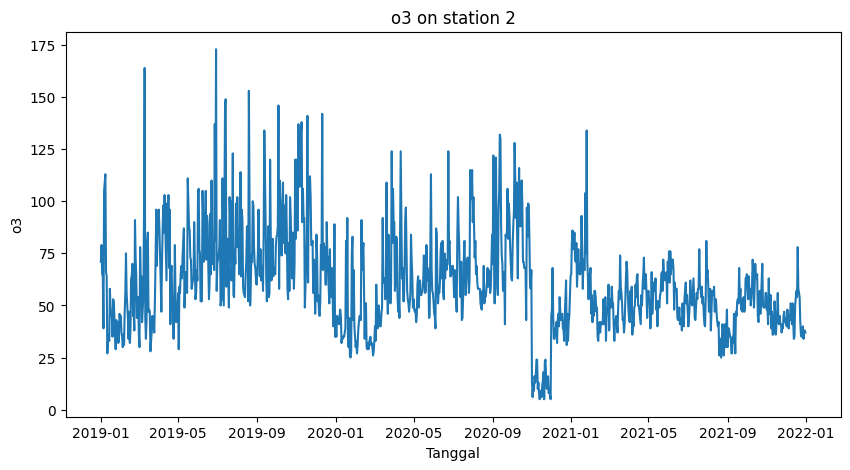

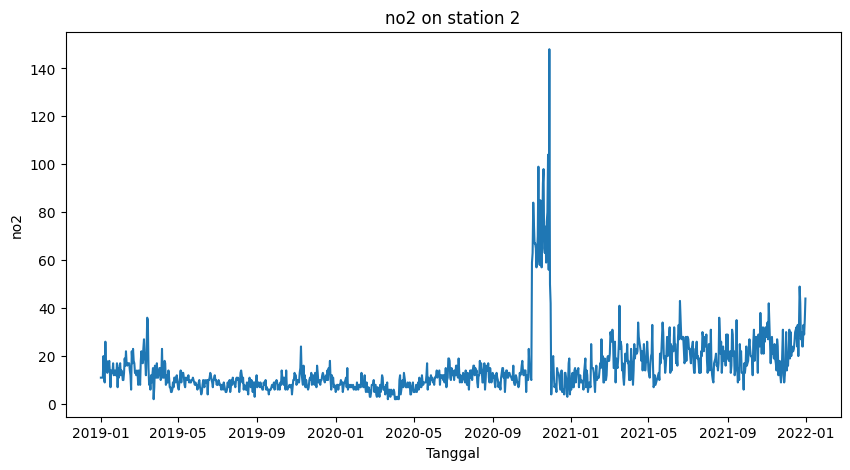

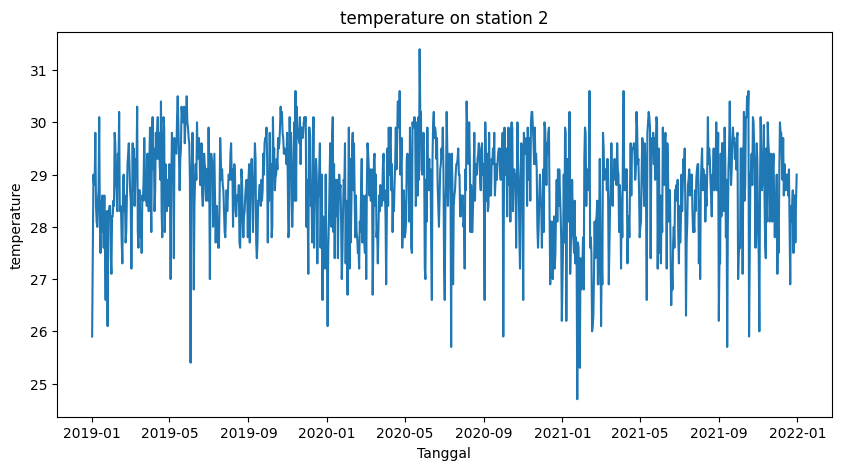

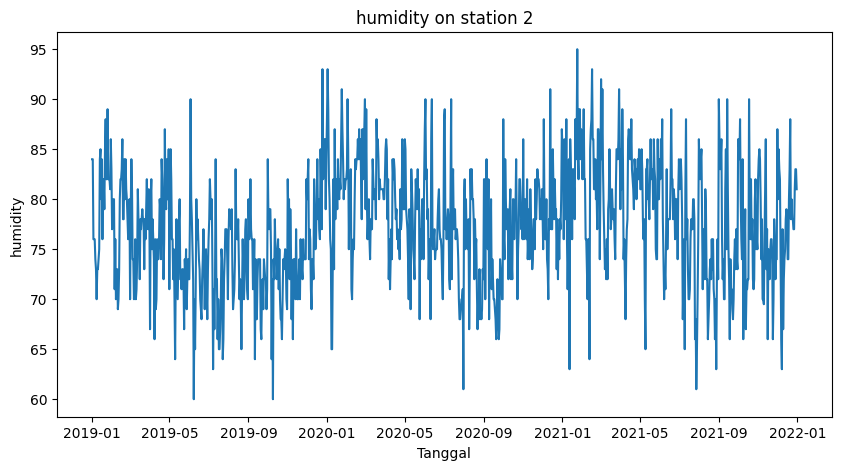

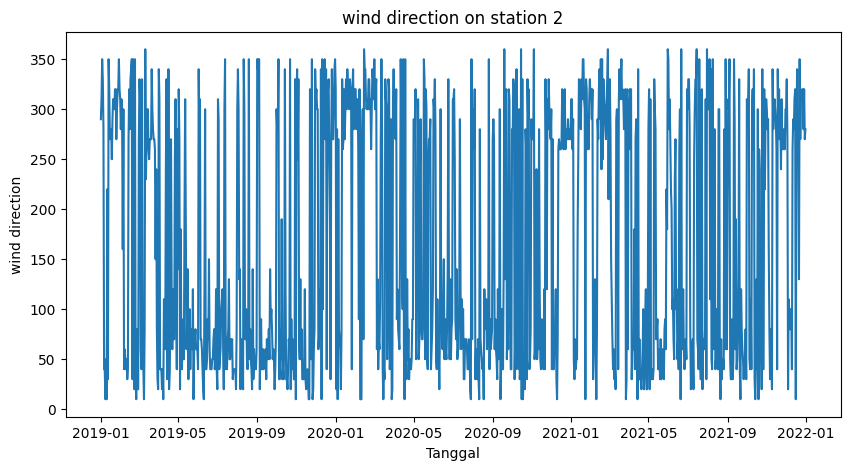

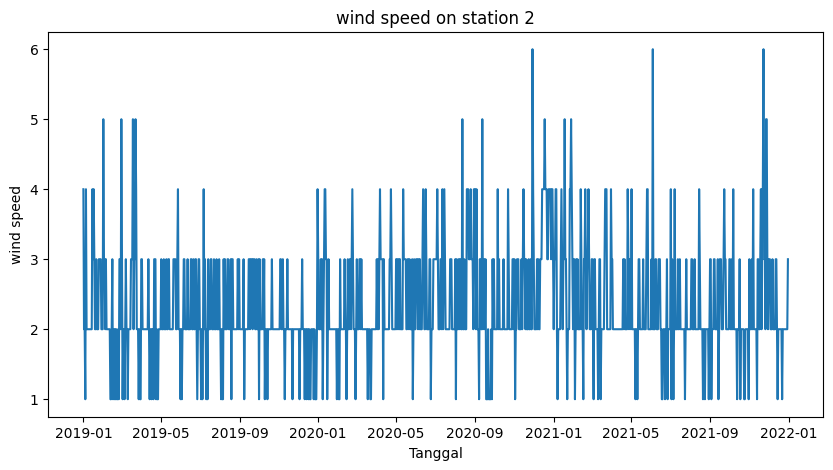

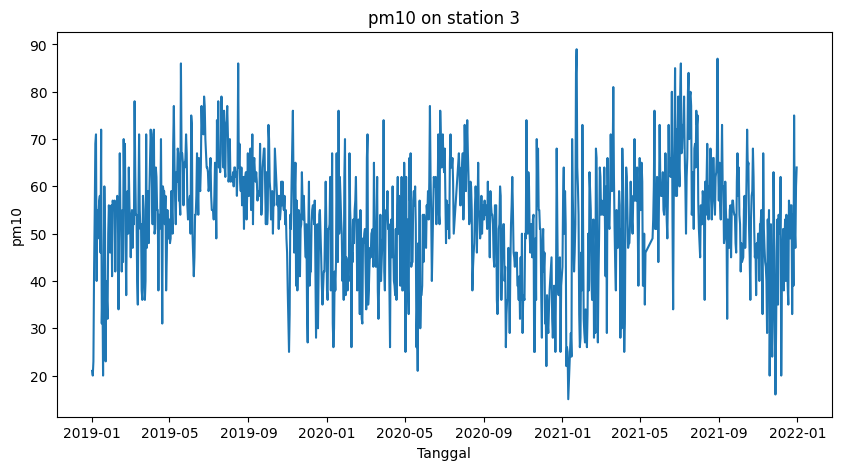

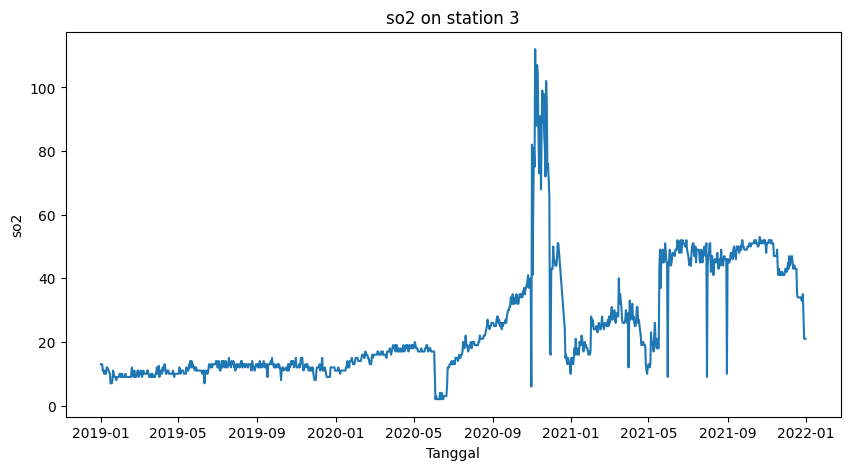

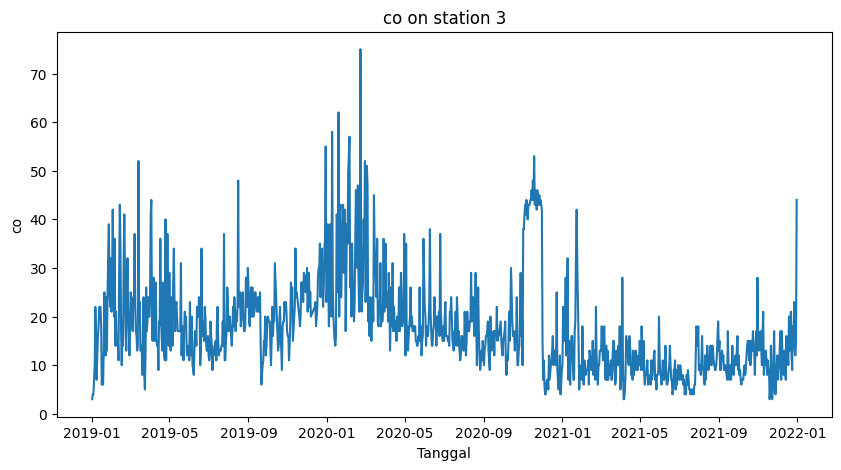

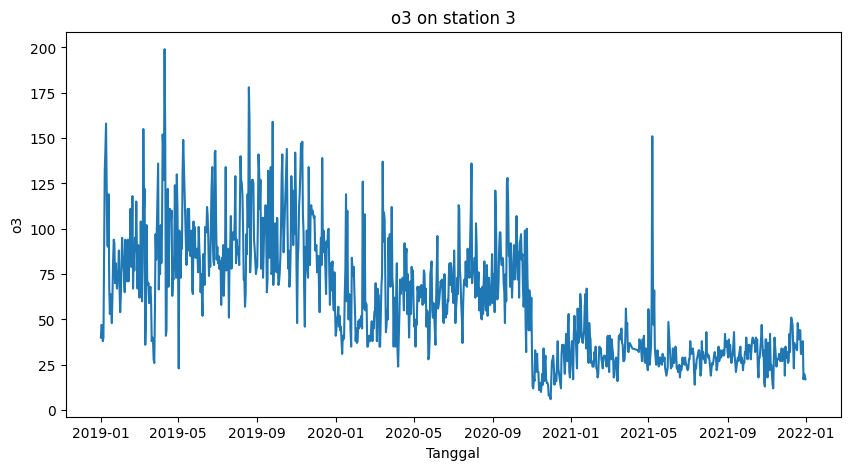

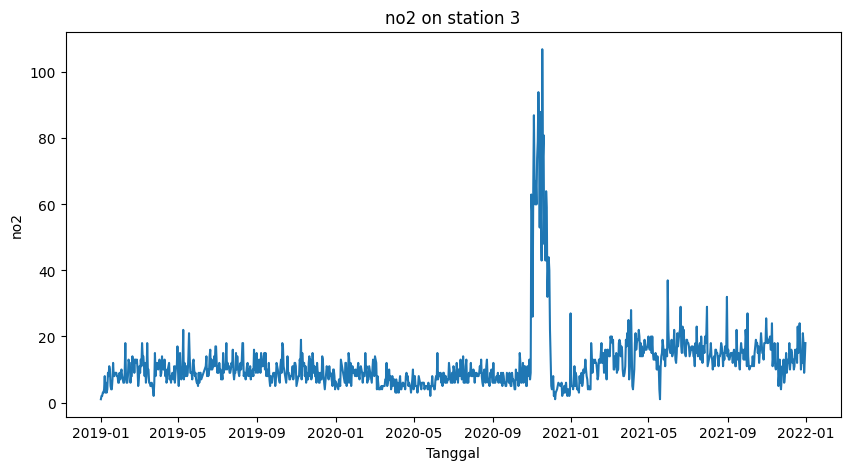

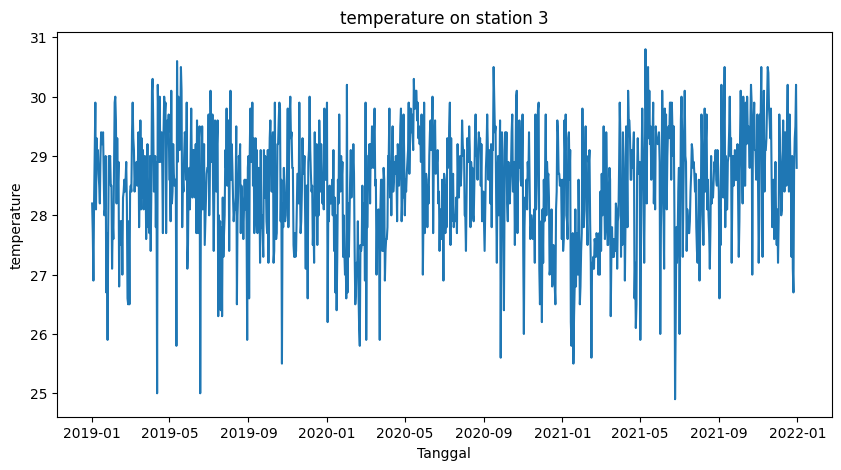

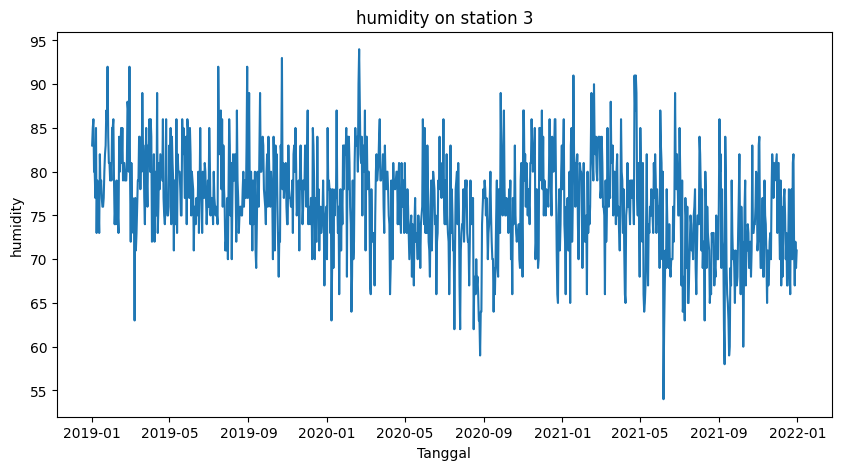

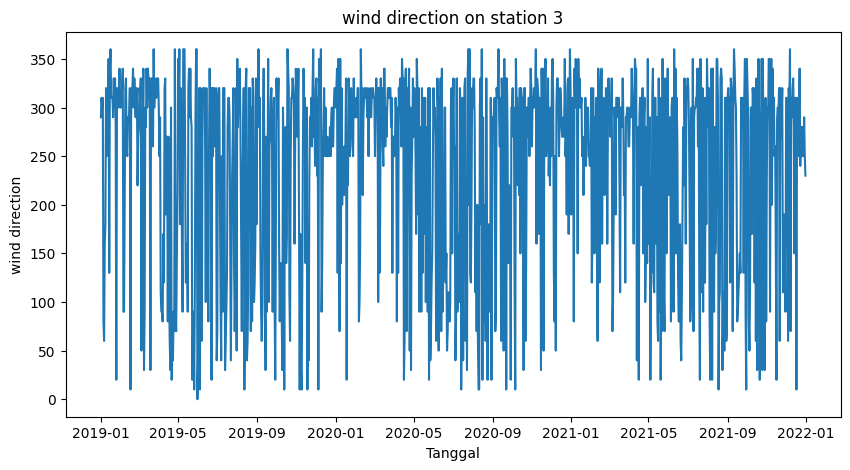

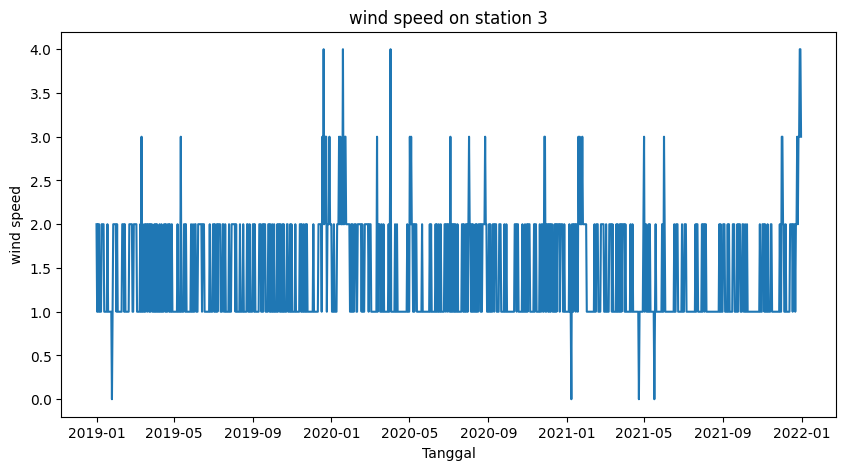

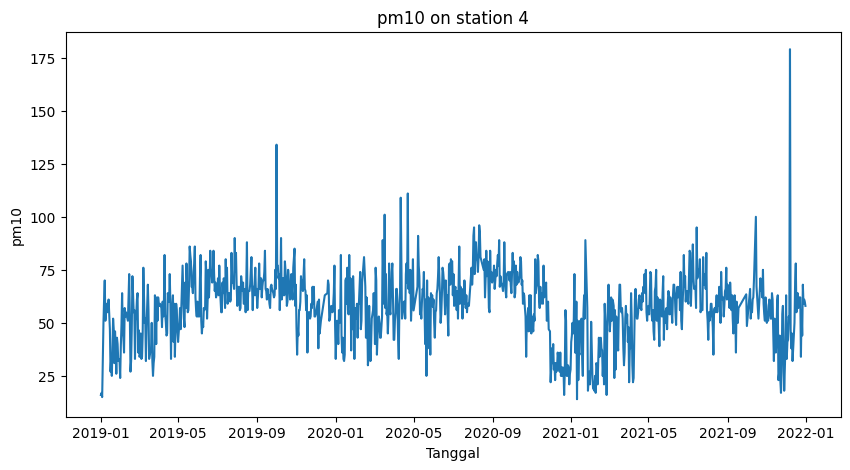

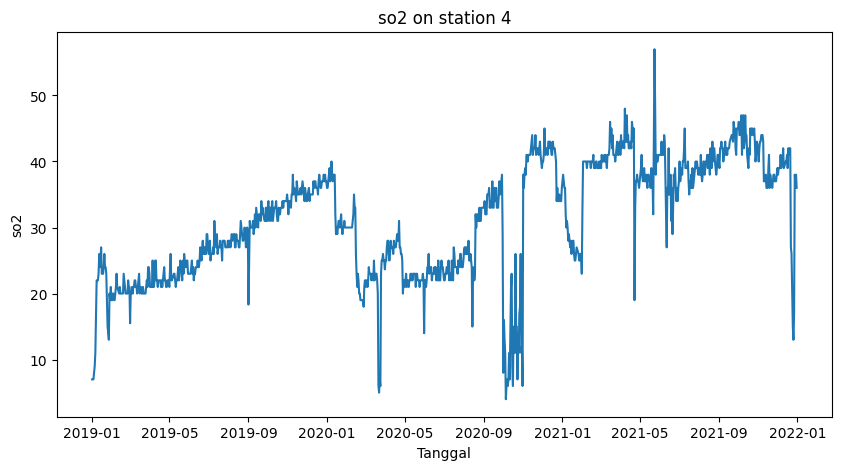

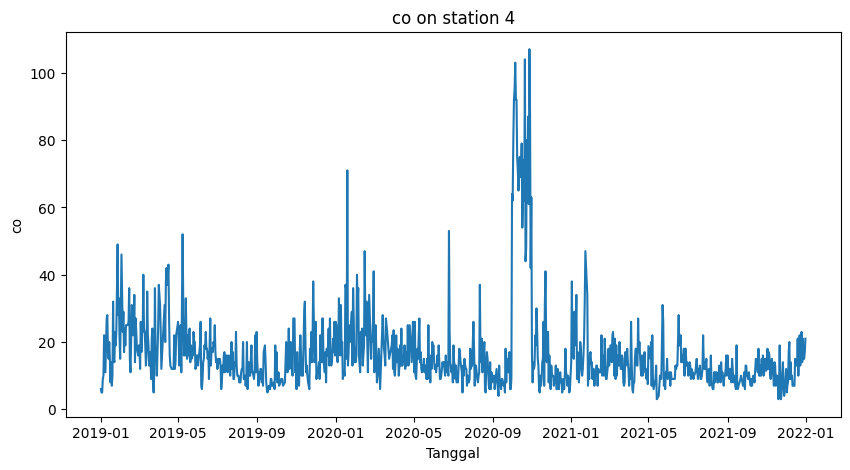

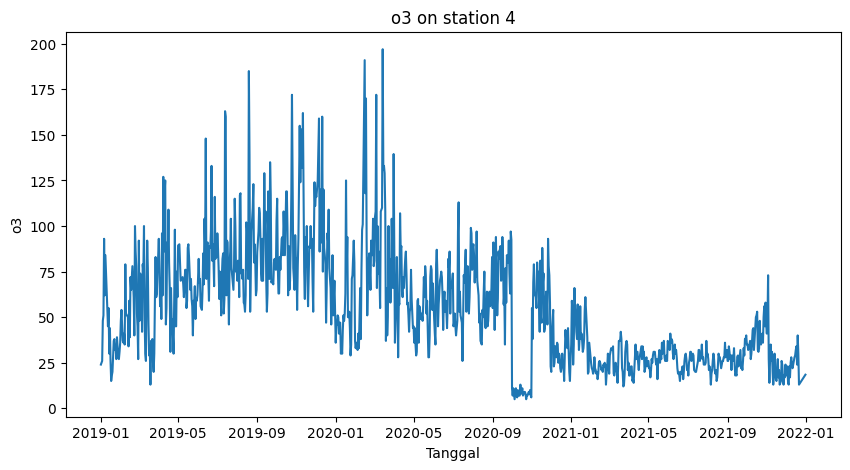

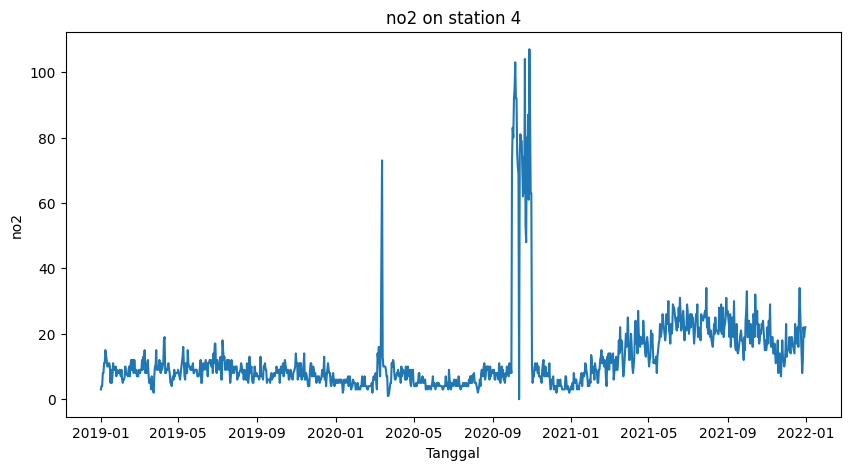

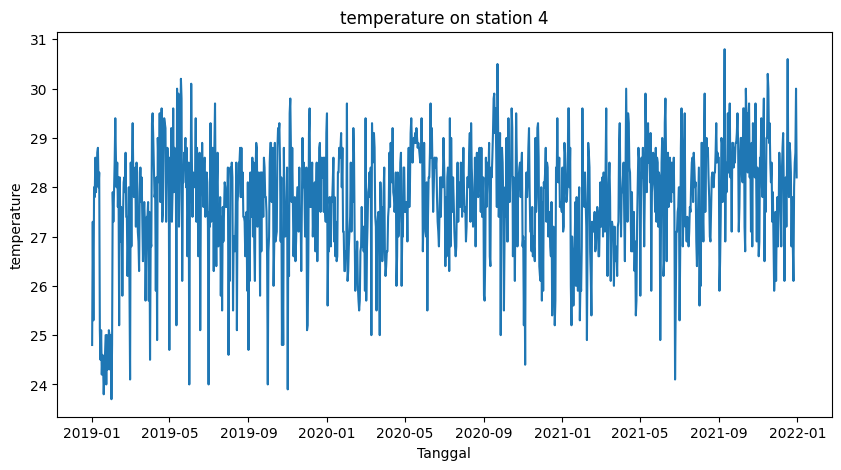

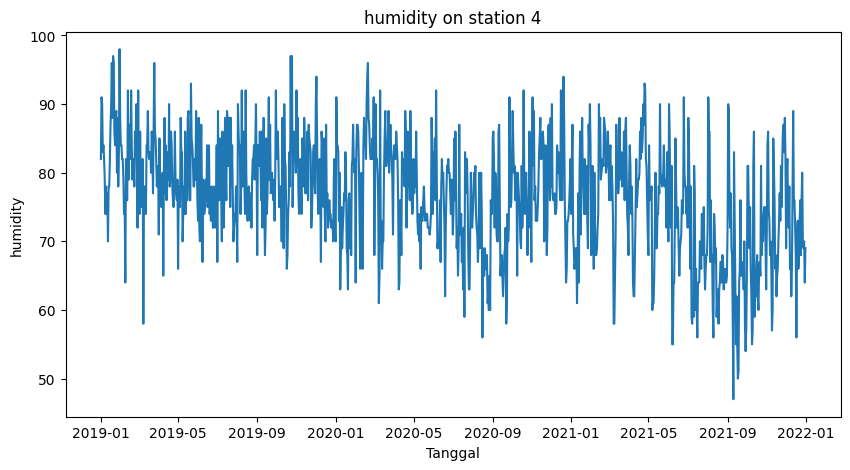

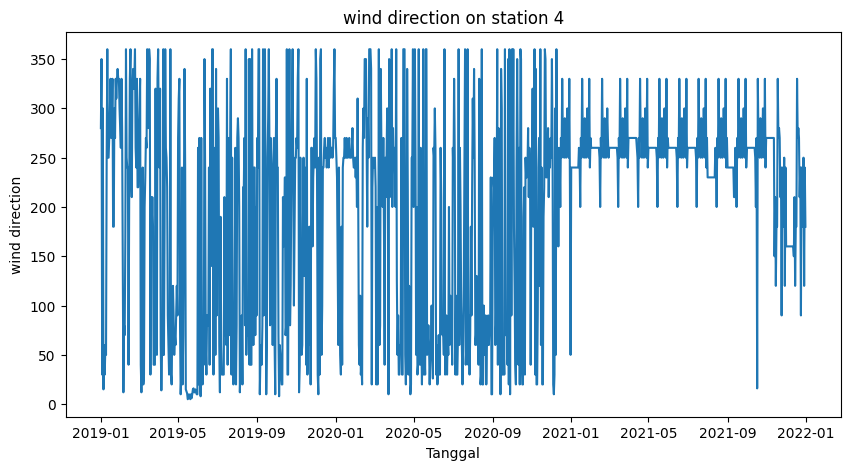

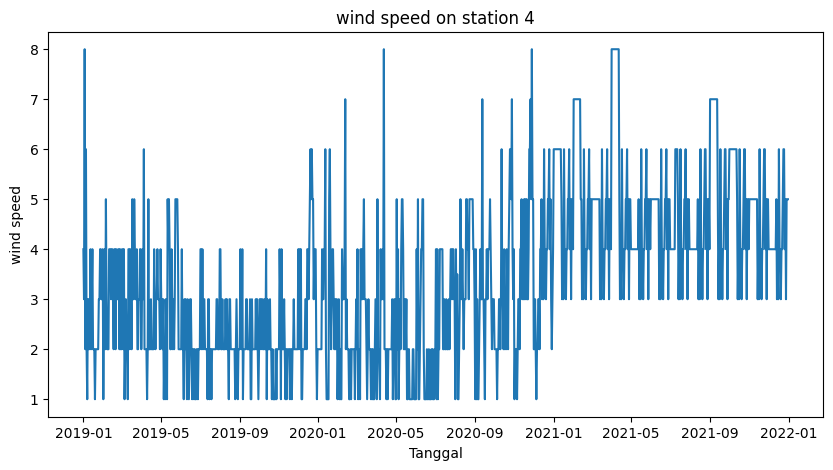

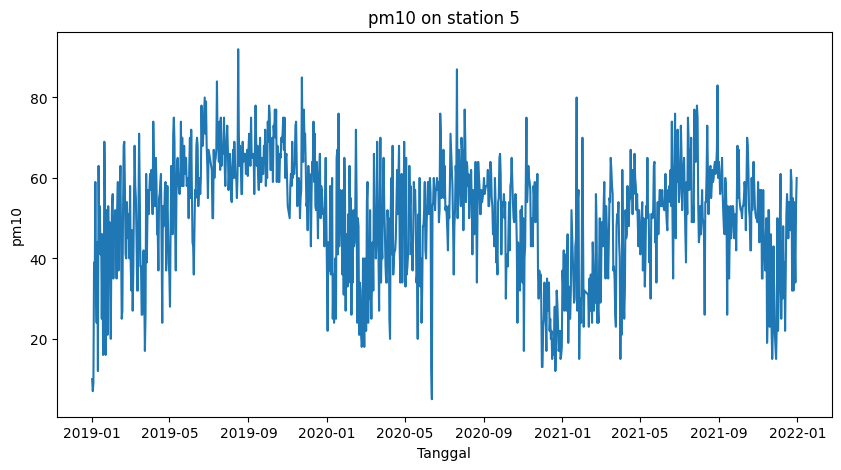

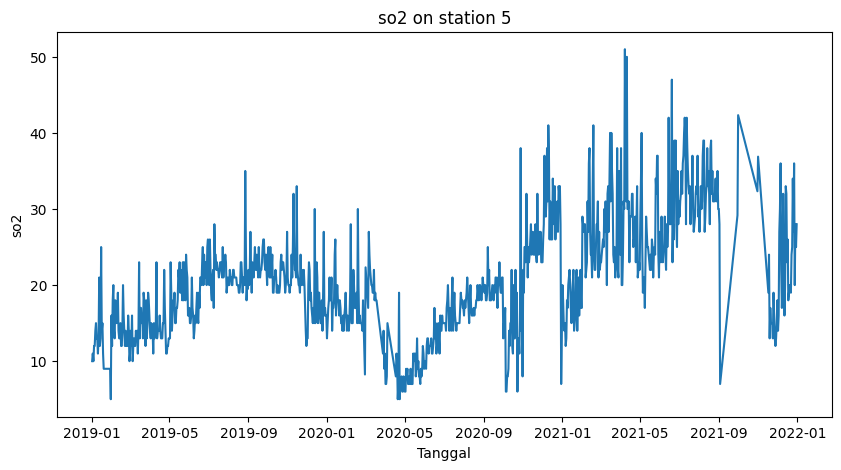

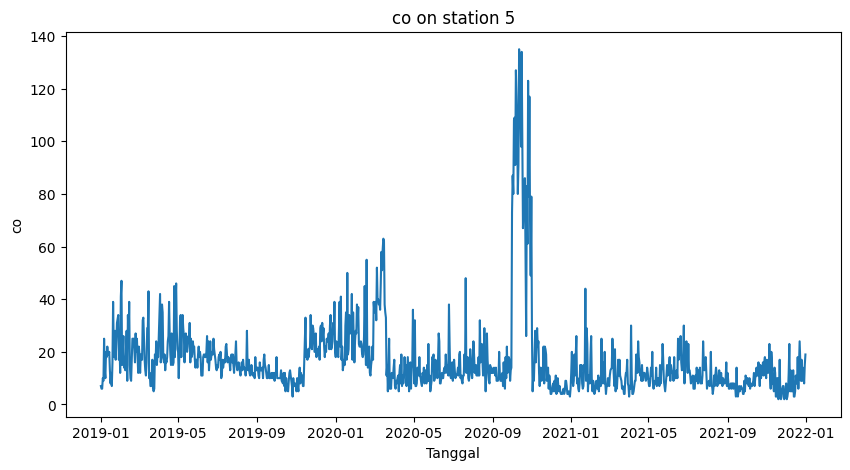

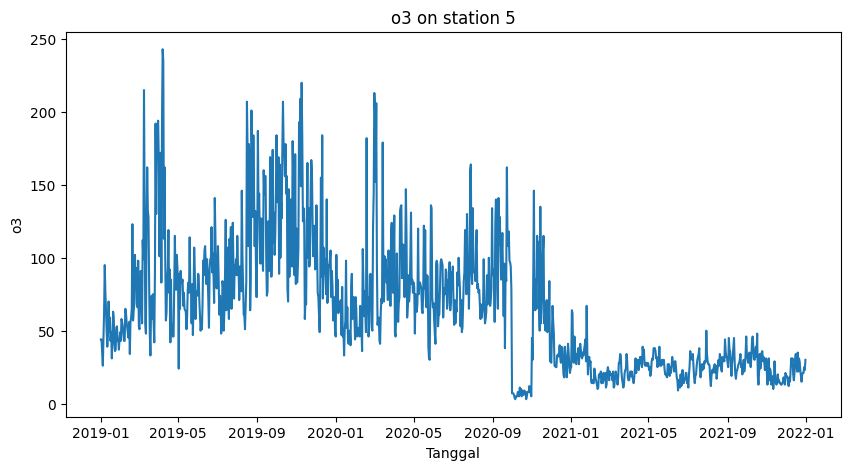

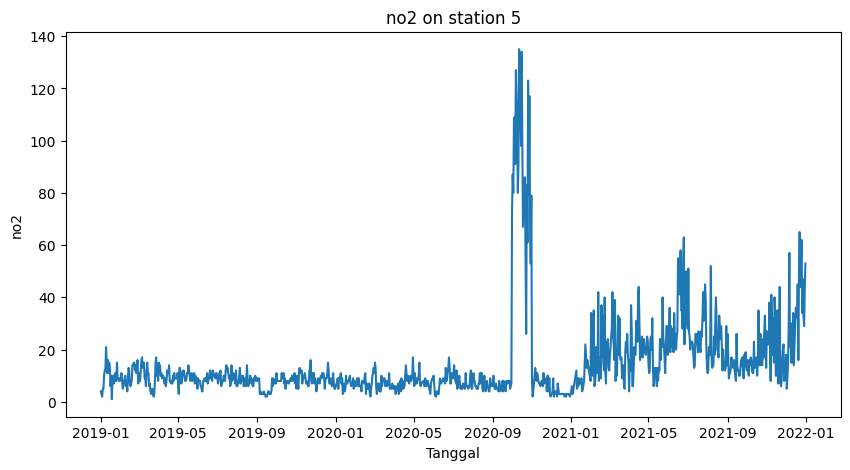

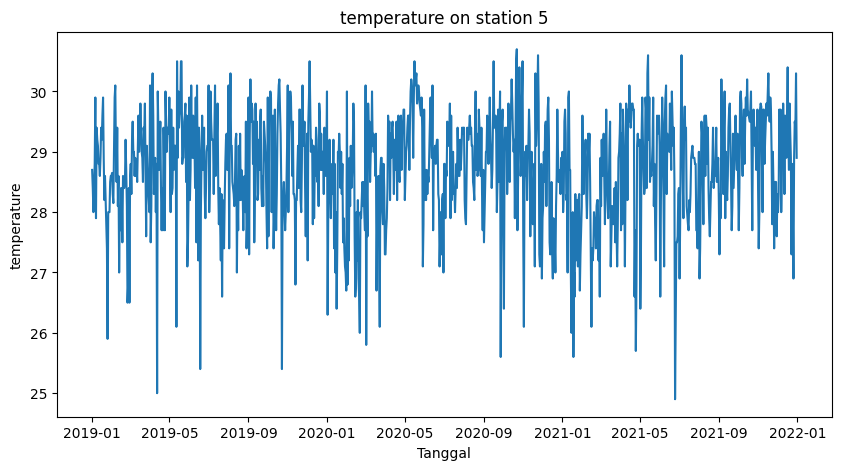

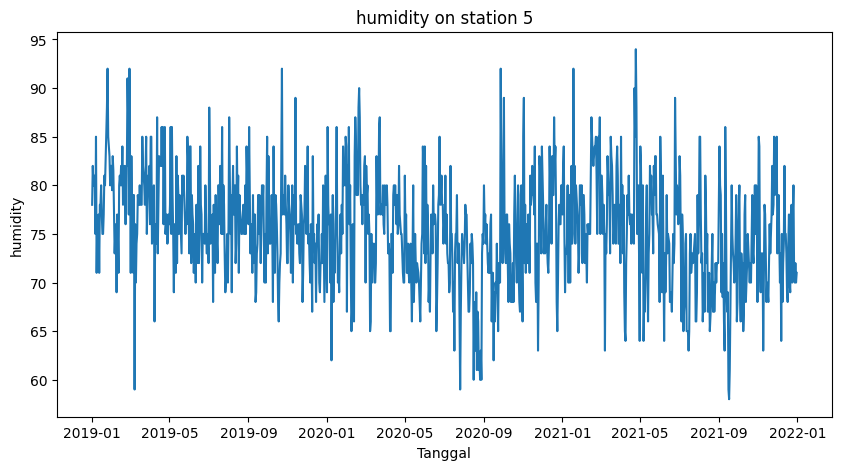

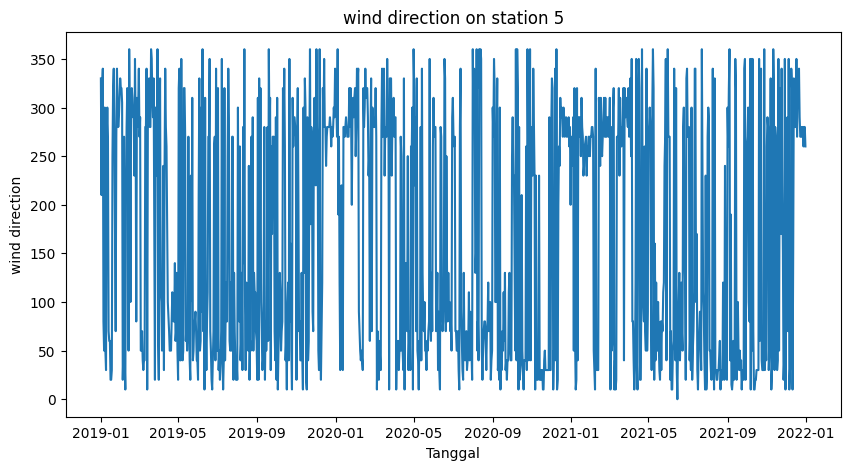

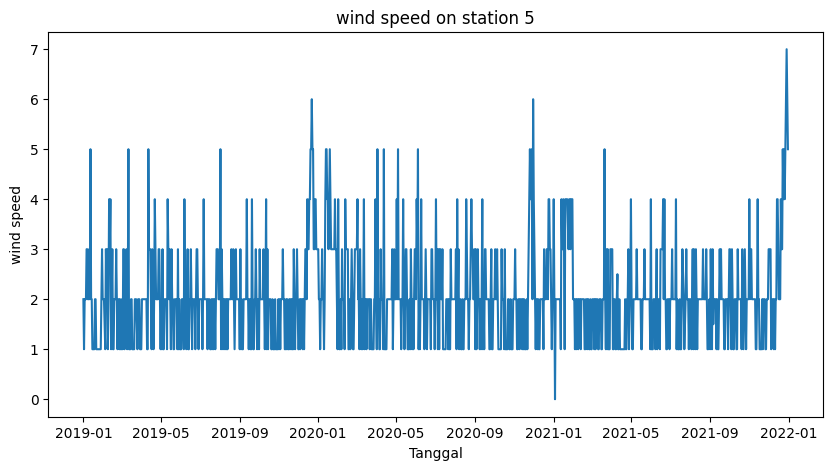

In [ ]:
for number in range(1,6):
  graph_per_station(number)

In [ ]:
df_st1 = df_join.loc[df_join['stasiun']==1].reset_index()
df_st2 = df_join.loc[df_join['stasiun']==2].reset_index()
df_st3 = df_join.loc[df_join['stasiun']==3].reset_index()
df_st4 = df_join.loc[df_join['stasiun']==4].reset_index()
df_st5 = df_join.loc[df_join['stasiun']==5].reset_index()

In [ ]:
df_st1

index    tanggal  stasiun  pm10   so2    co     o3   no2  temperature  \
0         0 2019-01-01        1  29.0  15.0   5.0  29.00  13.0         26.0   
1         1 2019-01-02        1  24.0  17.0   5.0  29.00   6.0         27.0   
2         2 2019-01-03        1  16.0  16.0   5.0  29.00   4.0         28.3   
3         3 2019-01-04        1  38.0  18.0   8.0  24.00  10.0         28.3   
4         4 2019-01-05        1  37.0  29.0  16.0  40.25  16.0         28.6   
...     ...        ...      ...   ...   ...   ...    ...   ...          ...   
1091   5351 2021-12-27        1  52.0  61.0  15.0  20.00  15.0         28.2   
1092   5352 2021-12-28        1  51.0  53.0  15.0  18.00  13.0         28.2   
1093   5353 2021-12-29        1  31.0  54.0  10.0  24.00  11.0         27.5   
1094   5354 2021-12-30        1  55.0  53.0  16.0  23.00  14.0         28.0   
1095   5355 2021-12-31        1  62.0  52.0  23.0  20.00  14.0         29.3   

      humidity  wind direction  wind speed  
0         84.0           240.0         2.0  
1         83.0           260.0         1.0  
2         80.0           310.0         2.0  
3         76.0           200.0         2.0  
4         76.0           240.0         3.0  
...        ...             ...         ...  
1091      77.0           330.0         2.0  
1092      82.0           340.0         2.0  
1093      84.0           320.0         1.0  
1094      84.0           320.0         1.0  
1095      77.0           260.0         1.0  

[1096 rows x 12 columns]

In [ ]:
#splitting data
X = pd.DataFrame(df_join.loc[:,['so2','co','o3','no2','temperature','humidity','wind direction','wind speed']].values)
Y = pd.DataFrame(df_join.loc[:,['stasiun','pm10']].values)
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size = .75)

x_train, x_test, y_train, y_test

(              0          1          2          3     4     5      6    7
 139   14.000000   8.000000  43.000000   6.000000  29.2  77.0   20.0  1.0
 3282  41.000000  14.000000  61.000000  10.000000  29.6  70.0  270.0  1.0
 3906  40.000000  11.000000  25.000000   9.000000  26.7  90.0  260.0  5.0
 1149  11.000000  28.000000  89.000000  10.000000  28.6  77.0  120.0  1.0
 5243  51.000000  21.000000  19.500000  24.000000  29.2  68.0  200.0  2.0
 ...         ...        ...        ...        ...   ...   ...    ...  ...
 3772  26.333333  38.333333  46.333333   8.333333  25.9  81.0  270.0  6.0
 5191  50.000000  13.000000  15.000000   9.000000  30.0  71.0  250.0  1.0
 5226   8.000000   7.000000  41.000000  12.000000  29.2  76.0  290.0  4.0
 5390  45.000000  10.000000  26.000000  13.000000  29.7  74.0   60.0  2.0
 860   24.000000  15.000000  91.000000   7.000000  28.3  75.0   90.0  3.0
 
 [4110 rows x 8 columns],
          0          1      2     3     4     5      6    7
 3167  20.0  14.000000  

In [ ]:
#splitting data
# X = pd.DataFrame(df_st1.loc[:,['so2','co','o3','no2','temperature','humidity','wind direction','wind speed']].values)
# Y = pd.DataFrame(df_st1.loc[:,['pm10']].values)
# x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size = .75)

# x_train, x_test, y_train, y_test

In [ ]:
x_train = x_train.values.reshape(-1)

In [ ]:
y_train = y_train.values.reshape(-1)

In [ ]:
x_train = x_train.reshape(-1,8)
y_train = y_train.reshape(-1,2)

In [ ]:
#preparing channel specific data
st1_arr = []
for i in range(x_train.shape[0]):
  polutan = x_train[:3]
  met = x_train[3:]
  a = np.vstack((polutan, met))
  a = a.tolist()
  st1_arr.append(a)
st1_arr = np.array(st1_arr)
#st1_arr = tf.expand_dims(st1_arr, axis=0)
st1_arr = np.reshape(st1_arr, [st1_arr.shape[0],-1,5,8])
#st1_arr = np.reshape(st1_arr, [st1_arr.shape[0],-1,2,2])
#st1_arr = np.reshape(st1_arr,(st1_arr.shape[0],-1,8))

#inputs = tf.reshape(x_input, shape=[-1, self.para.site_num, self.para.features])

In [ ]:
st1_arr.shape

(4110, 822, 5, 8)

In [ ]:
st1_arr_y = np.reshape(y_train, [-1,5,2])
st1_arr_y.shape

(822, 5, 2)

In [ ]:
#arrange features and target
inputs = st1_arr
y = st1_arr_y
#y = y_train.reset_index().loc[:,[0]].values

In [ ]:
class resnet(object):
    def __init__(self, para=None):
        '''
        :param batch_size:
        :param para:
        '''
        self.para = para
        self.h = [2, 2, 2]
        self.w = [2, 2, 2]
        self.out_channel = [2, 2, 2]
        self.in_channel = [1] + self.out_channel
        self.features = 5

    def conv_2d(self, x, h, w, in_channel, out_channel, layer_name):
        '''
        :param x:
        :param h:
        :param w:
        :param in_channel:
        :param out_channel:
        :return:
        '''
        filter = tf.Variable(initial_value=tf.random.truncated_normal(shape=[h, w, in_channel, out_channel], stddev=0.1),
                             name=layer_name)
        # filter = tf.get_variable(name=layer_name, shape=[h, w, in_channel, out_channel],initializer=tf.truncated_normal_initializer(stddev=0.1))
        bias = tf.compat.v1.get_variable(layer_name + "/bias", [out_channel], initializer=tf.constant_initializer(0))
        layer = tf.nn.conv2d(input=x, filters=filter, strides=[1, 1, 1, 1], padding='SAME')
        return tf.nn.bias_add(layer, bias)

    def relu(self, inputs):
        '''
        :param inputs:
        :return:
        '''
        relu = tf.nn.relu(inputs)
        return relu

    def block(self, x, in_channel, out_channel, block_name):
        '''
        :param x:
        :param in_channel:
        :param out_channel:
        :param block_name:
        :return:
        '''
        x1 = self.conv_2d(x, self.h[0], self.w[0], in_channel[0], out_channel[0], block_name + '/1')
        x1 = self.relu(x1)
        x2 = self.conv_2d(x1, self.h[0], self.w[0], in_channel[1], out_channel[1], block_name + '/2')
        x2 = self.relu(x2)
        x3 = self.conv_2d(x2, self.h[0], self.w[0], in_channel[2], out_channel[2], block_name + '/3')
        x3 = self.relu(x3)
        return x3

    def residual_connected(self, x1, x2, h, w, in_channel, out_channel, residual_name):
        '''
        :param x1:
        :param x2:
        :param h:
        :param w:
        :param in_channel:
        :param out_channel:
        :param residual_name:
        :return:
        '''
        filter = tf.Variable(initial_value=tf.random_normal(shape=[h, w, in_channel, out_channel]), name=residual_name)
        bias = tf.get_variable(residual_name + "/bias", [out_channel], initializer=tf.constant_initializer(0))
        conv = tf.nn.conv2d(x1, filter, strides=[1, 1, 1, 1], padding='SAME')
        conv = tf.nn.bias_add(conv, bias)
        layer_add = conv + x2
        return self.relu(layer_add)

    def cnn(self, x):
        '''
        :param x: [batch size, site num, features, channel]
        :return: [batch size, height, channel]
        '''

        with tf.name_scope('resnet'):
            block1 = self.block(x, [1, 3, 3], [3, 3, 3], block_name='block1')
            residual1 = self.residual_connected(x, block1, 1, 1, 1, 3, residual_name='residual1')
            print('residual 1 shape is : ', residual1.shape)

            block2 = self.block(residual1, [3, 6, 6], [6, 6, 6], block_name='block2')
            residual2 = self.residual_connected(residual1, block2, 1, 1, 3, 6, residual_name='residual2')
            print('residual 2 shape is : ', residual2.shape)

            block3 = self.block(residual2, [6, 6, 6], [6, 6, 6], block_name='block3')
            residual3 = self.residual_connected(residual2, block3, 1, 1, 6, 6, residual_name='residual3')
            print('residual 3 shape is : ', residual3.shape)

            block4 = self.block(residual3, [6, 6, 6], [6, 6, 6], block_name='block4')
            residual4 = self.residual_connected(residual3, block4, 1, 1, 6, 6, residual_name='residual4')
            print('residual 4 shape is : ', residual4.shape)

            # max_pool=tf.nn.avg_pool(residual4, ksize=[1, 2, 2, 1], strides=[1, 1, 2, 1], padding='SAME')

            max_pool = residual4
            print('max_pool output shape is : ', max_pool.shape)

        # cnn_shape = max_pool3.get_shape().as_list()
        # nodes = cnn_shape[1] * cnn_shape[2] * cnn_shape[3]
        # reshaped = tf.reshape(max_pool3, [cnn_shape[0], nodes])

        return max_pool


if __name__ == '__main__':
    batch_size = 32
    timesteps = 2
    shape = [162, 8]
    kernel = [162, 2]
    channels = 1
    filters = 12  # numbers of output channel

    # Create a placeholder for videos.
    #inputs = tf.placeholder(tf.float32, [batch_size, 1, 7, 1])

    multi = resnet(32)
    multi.cnn(inputs)

InvalidArgumentError: {{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:CPU:0}} output depth must be evenly divisible by number of groups: 3 vs 8 [Op:Conv2D] name: 

In [ ]:
input = tf.keras.layers.Input(shape=(4110, 5, 8))

# 1st
conv1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(2,2), activation='relu', padding='same')(input)
bn = tf.keras.layers.BatchNormalization()(conv1)

conv2 = tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(bn)
bn = tf.keras.layers.BatchNormalization()(conv2)

conv3 = tf.keras.layers.Conv2D(filters=8, kernel_size=(2,2), activation='relu', padding='same')(bn)
bn = tf.keras.layers.BatchNormalization()(conv3)

# skipping layer
skip = tf.keras.layers.Conv2D(filters=8, kernel_size=(1,1), activation='relu', padding='same')(bn)
skip = tf.keras.layers.BatchNormalization()(skip)
sum1 = tf.keras.layers.Add()([conv3,skip])

# 2nd
conv4 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), activation='relu', padding='same')(sum1)
bn = tf.keras.layers.BatchNormalization()(conv4)

conv5 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(bn)
bn = tf.keras.layers.BatchNormalization()(conv5)

conv6 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), activation='relu', padding='same')(bn)
bn = tf.keras.layers.BatchNormalization()(conv6)

# skipping layer
skip = tf.keras.layers.Conv2D(filters=16, kernel_size=(1,1), activation='relu', padding='same')(bn)
skip = tf.keras.layers.BatchNormalization()(skip)
sum2 = tf.keras.layers.Add()([conv6,skip])

# 3rd
conv7 = tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', padding='same')(sum2)
bn = tf.keras.layers.BatchNormalization()(conv1)

conv8 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(bn)
bn = tf.keras.layers.BatchNormalization()(conv2)

conv9 = tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', padding='same')(bn)
bn = tf.keras.layers.BatchNormalization()(conv3)

# skipping layer
skip = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), activation='relu', padding='same')(bn)
skip = tf.keras.layers.BatchNormalization()(skip)
sum3 = tf.keras.layers.Add()([conv9,skip])

# 4th
conv10 = tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', padding='same')(sum3)
bn = tf.keras.layers.BatchNormalization()(conv1)

conv11 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(bn)
bn = tf.keras.layers.BatchNormalization()(conv2)

conv12 = tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', padding='same')(bn)
bn = tf.keras.layers.BatchNormalization()(conv3)

# skipping layer
skip = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), activation='relu', padding='same')(bn)
skip = tf.keras.layers.BatchNormalization()(skip)
sum4 = tf.keras.layers.Add()([conv12,skip])

In [ ]:
fc1 = tf.keras.layers.Dense(256, activation="relu")(sum4)
fc2 = tf.keras.layers.Dense(128, activation="relu")(fc1)
outputs = tf.keras.layers.Dense(1, activation="linear")(fc2)

In [ ]:
model = tf.keras.Model(inputs=input, outputs=outputs, name='test')
model.summary()

Model: "test"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 4110, 5, 8)]         0         []                            
                                                                                                  
 conv2d_32 (Conv2D)          (None, 4110, 5, 8)           264       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_32 (Ba  (None, 4110, 5, 8)           32        ['conv2d_32[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 conv2d_33 (Conv2D)          (None, 4110, 5, 8)           584       ['batch_normalization_32[0]

In [ ]:
# Set the learning rate
learning_rate = 0.001

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
history = model.fit(x,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: Input 0 of layer "test" is incompatible with the layer: expected shape=(None, 4110, 5, 8), found shape=(32, 822, 5, 8)

In [ ]:
class ResidualBlock(layers.Layer):
  def __init__(self):
    super(ResidualBlock, self).__init__()
    self.conv1 = layers.Conv1D(8, kernel_size=2, padding='same', activation='relu')
    self.conv2 = layers.Conv1D(8, kernel_size=3, padding='same', activation='relu')
    self.conv3 = layers.Conv1D(8, kernel_size=2, padding='same')
    self.conv4 = layers.Conv1D(16, kernel_size=2, padding='same', activation='relu')
    self.conv5 = layers.Conv1D(16, kernel_size=3, padding='same', activation='relu')
    self.conv6 = layers.Conv1D(16, kernel_size=2, padding='same')
    self.conv7 = layers.Conv1D(32, kernel_size=2, padding='same', activation='relu')
    self.conv8 = layers.Conv1D(32, kernel_size=3, padding='same', activation='relu')
    self.conv9 = layers.Conv1D(32, kernel_size=2, padding='same')

  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.conv2(x)
    x = self.conv3(x)
    output1 = layers.Add()([inputs, x])
    # x = self.conv4(x)
    # x = self.conv5(x)
    # x = self.conv6(x)
    # output2 = layers.Add()([output1, x])
    # x = self.conv7(x)
    # x = self.conv8(x)
    # x = self.conv9(x)
    # output3 = layers.Add()([output2, x])
    # x = self.conv7(x)
    # x = self.conv8(x)
    # x = self.conv9(x)
    # x = layers.Add()([output3, x])
    return output1

In [ ]:
class ResNetFeatureExtractor(tf.keras.models.Model):
  def __init__(self, num_filters, num_blocks):
    super(ResNetFeatureExtractor, self).__init__()
    self.num_filters = num_filters
    self.num_blocks = num_blocks

    #Define layers
    self.conv1 = layers.Conv1D(filters=self.num_filters, kernel_size=2, activation='relu', padding='same')
    self.blocks = tf.keras.Sequential([
        ResidualBlock() for _ in range(self.num_blocks)
    ])
    self.pool = layers.MaxPooling1D(pool_size=2)

  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.blocks(x)
    x = self.pool(x)
    return x

In [ ]:
# Define model parameters
timesteps = 1  # Number of time steps in the sequence
n_features = 8  # Number of features in the time series (univariate)
filters = 32  # Number of filters in the convolutional layer
lstm_units = 64  # Number of units in the LSTM layer

# Define the input layer
inputs = ResNetFeatureExtractor(filters, 1)
inputs = inputs(x)

# 1D convolutional layer
conv1 = tf.keras.layers.Conv1D(filters, kernel_size=3, activation="relu", padding='same')

# TimeDistributed layer
td = tf.keras.layers.TimeDistributed(conv1)(inputs)

# LSTM layer
lstm = tf.keras.layers.LSTM(lstm_units, return_sequences=True)(td)

# Output layer (adapt based on your task)
fc1 = tf.keras.layers.Dense(256, activation="relu")(lstm)
fc2 = tf.keras.layers.Dense(128, activation="relu")(fc1)
outputs = tf.keras.layers.Dense(1, activation="linear")(fc2)

# Build the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss="mae", optimizer=tf.keras.optimizers.SGD(learning_rate=0.001))

# Train the model (replace with your training data)
model.fit(x_train, y_train, epochs=100)

# # Make predictions on new data
# predictions = model.predict(X_test)


In [ ]:
# #identity block
# def identity_block(x, filter):
#     # copy tensor to variable called x_skip
#     x_skip = x
#     # Layer 1
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 2
#     x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 3
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Add Residue
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 4
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 5
#     x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 6
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Add Residue
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 7
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 8
#     x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 9
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Add Residue
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 10
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 11
#     x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 12
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Add Residue
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = tf.keras.layers.Activation('relu')(x)
#     return x

In [ ]:
# #conv block
# def convolutional_block(x, filter):
#     # copy tensor to variable called x_skip
#     x_skip = x
#     # Layer 1
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same', strides = (2,2))(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 2
#     x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 3
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same', strides = (2,2))(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Processing Residue with conv(1,1)
#     x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
#     # Add Residue
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 4
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same', strides = (2,2))(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 5
#     x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 6
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same', strides = (2,2))(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Processing Residue with conv(1,1)
#     x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
#     # Add Residue
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 7
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same', strides = (2,2))(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 8
#     x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 9
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same', strides = (2,2))(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Processing Residue with conv(1,1)
#     x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
#     # Add Residue
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 10
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same', strides = (2,2))(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 11
#     x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Layer 12
#     x = tf.keras.layers.Conv2D(filter, (2,2), padding = 'same', strides = (2,2))(x)
#     x = tf.keras.layers.BatchNormalization(axis=3)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     # Processing Residue with conv(1,1)
#     x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
#     # Add Residue
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = tf.keras.layers.Activation('relu')(x)
#     return x

In [ ]:
# def ResNet34(shape = (32, 32, 3), classes = 10):
#     # Step 1 (Setup Input Layer)
#     x_input = tf.keras.layers.Input(shape)
#     x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
#     # Step 2 (Initial Conv layer along with maxPool)
#     x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
#     # Define size of sub-blocks and initial filter size
#     block_layers = [3, 4, 6, 3]
#     filter_size = 64
#     # Step 3 Add the Resnet Blocks
#     for i in range(4):
#         if i == 0:
#             # For sub-block 1 Residual/Convolutional block not needed
#             for j in range(block_layers[i]):
#                 x = identity_block(x, filter_size)
#         else:
#             # One Residual/Convolutional Block followed by Identity blocks
#             # The filter size will go on increasing by a factor of 2
#             filter_size = filter_size*2
#             x = convolutional_block(x, filter_size)
#             for j in range(block_layers[i] - 1):
#                 x = identity_block(x, filter_size)
#     # Step 4 End Dense Network
#     x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
#     x = tf.keras.layers.Flatten()(x)
#     x = tf.keras.layers.Dense(512, activation = 'relu')(x)
#     x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)

#     model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
#     return model